# Redo of Week 3 Assignment

I will be redoing the Week 3 assignment to practice sorting data, normalizing data, and creating different maps using the various techniques we learned in labs.

# Import the libraries

In [1]:
# import pandas
import pandas as pd

# import geopandas
import geopandas as gpd

#import contextily
import contextily as ctx

#import matplotlib
import matplotlib.pyplot as plt

# to download osm data
import osmnx as ox

# Import the data

In [2]:
# load the data
tr = gpd.read_file('acs2019_5yr_B08134_14000US06037185320.geojson')

# Inspect the data

Use `.shape`, `.head`, `.tail`, `.plot` to inspect the data

In [3]:
tr.shape

(1005, 243)

The output from `.shape` tells us that the data set has 1005 rows and 243 columns.

In [4]:
tr.head()

,geoid,name,B08134001,"B08134001, Error",B08134002,"B08134002, Error",B08134003,"B08134003, Error",B08134004,"B08134004, Error",...,"B08134116, Error",B08134117,"B08134117, Error",B08134118,"B08134118, Error",B08134119,"B08134119, Error",B08134120,"B08134120, Error",geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1945.0,257.0,86.0,74.0,82.0,67.0,115.0,63.0,...,12.0,1.0,2.0,0.0,12.0,0.0,12.0,24.0,35.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1757.0,174.0,9.0,16.0,17.0,20.0,39.0,49.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2928.0,425.0,280.0,202.0,277.0,127.0,310.0,146.0,...,17.0,16.0,26.0,0.0,17.0,0.0,17.0,30.0,39.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1525.0,183.0,58.0,32.0,151.0,66.0,221.0,79.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,15.0,21.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1564.0,215.0,57.0,44.0,69.0,53.0,183.0,86.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


The output from `.head` shows us the first five rows of the dataset.

In [5]:
tr.tail()

,geoid,name,B08134001,"B08134001, Error",B08134002,"B08134002, Error",B08134003,"B08134003, Error",B08134004,"B08134004, Error",...,"B08134116, Error",B08134117,"B08134117, Error",B08134118,"B08134118, Error",B08134119,"B08134119, Error",B08134120,"B08134120, Error",geometry
1000,14000US06037980026,"Census Tract 9800.26, Los Angeles, CA",5.0,8.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517..."
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",24.0,27.0,15.0,26.0,9.0,7.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."
1004,16000US0644000,"Los Angeles, CA",1841598.0,6239.0,107784.0,2748.0,170859.0,2908.0,229791.0,3044.0,...,362.0,9712.0,836.0,3427.0,431.0,3700.0,429.0,6317.0,520.0,"MULTIPOLYGON (((-118.66818 34.18987, -118.6681..."


The output from the `.tail` shows us the last five rows of the dataset.

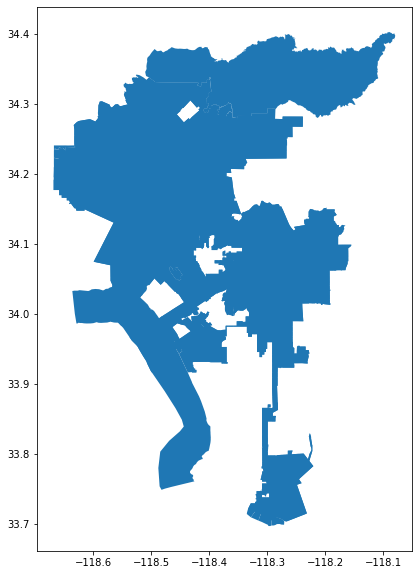

In [6]:
# plot the data
tr.plot(figsize=(10,10))

# Overwrite default display settings
I want to see the entire dataset, so I am going to overwrite the pandas default display settings which only output the first and last 10 columns.

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Use `.sample` to see what the data looks like now that the default display settings have been changed.

In [8]:
tr.sample()

,geoid,name,B08134001,"B08134001, Error",B08134002,"B08134002, Error",B08134003,"B08134003, Error",B08134004,"B08134004, Error",B08134005,"B08134005, Error",B08134006,"B08134006, Error",B08134007,"B08134007, Error",B08134008,"B08134008, Error",B08134009,"B08134009, Error",B08134010,"B08134010, Error",B08134011,"B08134011, Error",B08134012,"B08134012, Error",B08134013,"B08134013, Error",B08134014,"B08134014, Error",B08134015,"B08134015, Error",B08134016,"B08134016, Error",B08134017,"B08134017, Error",B08134018,"B08134018, Error",B08134019,"B08134019, Error",B08134020,"B08134020, Error",B08134021,"B08134021, Error",B08134022,"B08134022, Error",B08134023,"B08134023, Error",B08134024,"B08134024, Error",B08134025,"B08134025, Error",B08134026,"B08134026, Error",B08134027,"B08134027, Error",B08134028,"B08134028, Error",B08134029,"B08134029, Error",B08134030,"B08134030, Error",B08134031,"B08134031, Error",B08134032,"B08134032, Error",B08134033,"B08134033, Error",B08134034,"B08134034, Error",B08134035,"B08134035, Error",B08134036,"B08134036, Error",B08134037,"B08134037, Error",B08134038,"B08134038, Error",B08134039,"B08134039, Error",B08134040,"B08134040, Error",B08134041,"B08134041, Error",B08134042,"B08134042, Error",B08134043,"B08134043, Error",B08134044,"B08134044, Error",B08134045,"B08134045, Error",B08134046,"B08134046, Error",B08134047,"B08134047, Error",B08134048,"B08134048, Error",B08134049,"B08134049, Error",B08134050,"B08134050, Error",B08134051,"B08134051, Error",B08134052,"B08134052, Error",B08134053,"B08134053, Error",B08134054,"B08134054, Error",B08134055,"B08134055, Error",B08134056,"B08134056, Error",B08134057,"B08134057, Error",B08134058,"B08134058, Error",B08134059,"B08134059, Error",B08134060,"B08134060, Error",B08134061,"B08134061, Error",B08134062,"B08134062, Error",B08134063,"B08134063, Error",B08134064,"B08134064, Error",B08134065,"B08134065, Error",B08134066,"B08134066, Error",B08134067,"B08134067, Error",B08134068,"B08134068, Error",B08134069,"B08134069, Error",B08134070,"B08134070, Error",B08134071,"B08134071, Error",B08134072,"B08134072, Error",B08134073,"B08134073, Error",B08134074,"B08134074, Error",B08134075,"B08134075, Error",B08134076,"B08134076, Error",B08134077,"B08134077, Error",B08134078,"B08134078, Error",B08134079,"B08134079, Error",B08134080,"B08134080, Error",B08134081,"B08134081, Error",B08134082,"B08134082, Error",B08134083,"B08134083, Error",B08134084,"B08134084, Error",B08134085,"B08134085, Error",B08134086,"B08134086, Error",B08134087,"B08134087, Error",B08134088,"B08134088, Error",B08134089,"B08134089, Error",B08134090,"B08134090, Error",B08134091,"B08134091, Error",B08134092,"B08134092, Error",B08134093,"B08134093, Error",B08134094,"B08134094, Error",B08134095,"B08134095, Error",B08134096,"B08134096, Error",B08134097,"B08134097, Error",B08134098,"B08134098, Error",B08134099,"B08134099, Error",B08134100,"B08134100, Error",B08134101,"B08134101, Error",B08134102,"B08134102, Error",B08134103,"B08134103, Error",B08134104,"B08134104, Error",B08134105,"B08134105, Error",B08134106,"B08134106, Error",B08134107,"B08134107, Error",B08134108,"B08134108, Error",B08134109,"B08134109, Error",B08134110,"B08134110, Error",B08134111,"B08134111, Error",B08134112,"B08134112, Error",B08134113,"B08134113, Error",B08134114,"B08134114, Error",B08134115,"B08134115, Error",B08134116,"B08134116, Error",B08134117,"B08134117, Error",B08134118,"B08134118, Error",B08134119,"B08134119, Error",B08134120,"B08134120, Error",geometry
508,14000US06037203200,"Census Tract 2032, Los Angeles, CA",2227.0,284.0,138.0,83.0,190.0,113.0,368.0,169.0,322.0,119.0,57.0,46.0,386.0,133.0,253.0,85.0,239.0,101.0,274.0,141.0,1856.0,274.0,75.0,57.0,175.0,112.0,350.0,171.0,263.0,101.0,57.0,46.0,308.0,119.0,243.0,81.0,208.0,97.0,177.0,122.0,1396.0,221.0,42.0,44.0,56.0,61.0,316.0,169.0,239.0,97.0,57.0,46.0,271.0,107.0,190.0,86.0,141.0,73.0,84.0,59.0,460.0,195.0,33.0,39.0,119.0,72.0,34.0,36.0,24.0,24.0,0.0,17.0,37.0,59.0,53.0,56.0,67.0,50.0,93.0,

# Delete the last row 
The last row of the data is for the city, rather than an individual census tract. Thus, it is not relevant to what we are looking at.

In [9]:
# check the data using the .tail command
tr.tail()

,geoid,name,B08134001,"B08134001, Error",B08134002,"B08134002, Error",B08134003,"B08134003, Error",B08134004,"B08134004, Error",B08134005,"B08134005, Error",B08134006,"B08134006, Error",B08134007,"B08134007, Error",B08134008,"B08134008, Error",B08134009,"B08134009, Error",B08134010,"B08134010, Error",B08134011,"B08134011, Error",B08134012,"B08134012, Error",B08134013,"B08134013, Error",B08134014,"B08134014, Error",B08134015,"B08134015, Error",B08134016,"B08134016, Error",B08134017,"B08134017, Error",B08134018,"B08134018, Error",B08134019,"B08134019, Error",B08134020,"B08134020, Error",B08134021,"B08134021, Error",B08134022,"B08134022, Error",B08134023,"B08134023, Error",B08134024,"B08134024, Error",B08134025,"B08134025, Error",B08134026,"B08134026, Error",B08134027,"B08134027, Error",B08134028,"B08134028, Error",B08134029,"B08134029, Error",B08134030,"B08134030, Error",B08134031,"B08134031, Error",B08134032,"B08134032, Error",B08134033,"B08134033, Error",B08134034,"B08134034, Error",B08134035,"B08134035, Error",B08134036,"B08134036, Error",B08134037,"B08134037, Error",B08134038,"B08134038, Error",B08134039,"B08134039, Error",B08134040,"B08134040, Error",B08134041,"B08134041, Error",B08134042,"B08134042, Error",B08134043,"B08134043, Error",B08134044,"B08134044, Error",B08134045,"B08134045, Error",B08134046,"B08134046, Error",B08134047,"B08134047, Error",B08134048,"B08134048, Error",B08134049,"B08134049, Error",B08134050,"B08134050, Error",B08134051,"B08134051, Error",B08134052,"B08134052, Error",B08134053,"B08134053, Error",B08134054,"B08134054, Error",B08134055,"B08134055, Error",B08134056,"B08134056, Error",B08134057,"B08134057, Error",B08134058,"B08134058, Error",B08134059,"B08134059, Error",B08134060,"B08134060, Error",B08134061,"B08134061, Error",B08134062,"B08134062, Error",B08134063,"B08134063, Error",B08134064,"B08134064, Error",B08134065,"B08134065, Error",B08134066,"B08134066, Error",B08134067,"B08134067, Error",B08134068,"B08134068, Error",B08134069,"B08134069, Error",B08134070,"B08134070, Error",B08134071,"B08134071, Error",B08134072,"B08134072, Error",B08134073,"B08134073, Error",B08134074,"B08134074, Error",B08134075,"B08134075, Error",B08134076,"B08134076, Error",B08134077,"B08134077, Error",B08134078,"B08134078, Error",B08134079,"B08134079, Error",B08134080,"B08134080, Error",B08134081,"B08134081, Error",B08134082,"B08134082, Error",B08134083,"B08134083, Error",B08134084,"B08134084, Error",B08134085,"B08134085, Error",B08134086,"B08134086, Error",B08134087,"B08134087, Error",B08134088,"B08134088, Error",B08134089,"B08134089, Error",B08134090,"B08134090, Error",B08134091,"B08134091, Error",B08134092,"B08134092, Error",B08134093,"B08134093, Error",B08134094,"B08134094, Error",B08134095,"B08134095, Error",B08134096,"B08134096, Error",B08134097,"B08134097, Error",B08134098,"B08134098, Error",B08134099,"B08134099, Error",B08134100,"B08134100, Error",B08134101,"B08134101, Error",B08134102,"B08134102, Error",B08134103,"B08134103, Error",B08134104,"B08134104, Error",B08134105,"B08134105, Error",B08134106,"B08134106, Error",B08134107,"B08134107, Error",B08134108,"B08134108, Error",B08134109,"B08134109, Error",B08134110,"B08134110, Error",B08134111,"B08134111, Error",B08134112,"B08134112, Error",B08134113,"B08134113, Error",B08134114,"B08134114, Error",B08134115,"B08134115, Error",B08134116,"B08134116, Error",B08134117,"B08134117, Error",B08134118,"B08134118, Error",B08134119,"B08134119, Error",B08134120,"B08134120, Error",geometry
1000,14000US06037980026,"Census Tract 9800.26, Los Angeles, CA",5.0,8.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,5.0,8.0,0.0,12.0,5.0,8.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,5.0,8.0,0.0,12.0,5.0,8.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,5.0,8.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,

In [10]:
# drop the last row with the index 1004, using .drop
tr=tr.drop([1004])

In [11]:
# check the data again
tr.tail()

,geoid,name,B08134001,"B08134001, Error",B08134002,"B08134002, Error",B08134003,"B08134003, Error",B08134004,"B08134004, Error",B08134005,"B08134005, Error",B08134006,"B08134006, Error",B08134007,"B08134007, Error",B08134008,"B08134008, Error",B08134009,"B08134009, Error",B08134010,"B08134010, Error",B08134011,"B08134011, Error",B08134012,"B08134012, Error",B08134013,"B08134013, Error",B08134014,"B08134014, Error",B08134015,"B08134015, Error",B08134016,"B08134016, Error",B08134017,"B08134017, Error",B08134018,"B08134018, Error",B08134019,"B08134019, Error",B08134020,"B08134020, Error",B08134021,"B08134021, Error",B08134022,"B08134022, Error",B08134023,"B08134023, Error",B08134024,"B08134024, Error",B08134025,"B08134025, Error",B08134026,"B08134026, Error",B08134027,"B08134027, Error",B08134028,"B08134028, Error",B08134029,"B08134029, Error",B08134030,"B08134030, Error",B08134031,"B08134031, Error",B08134032,"B08134032, Error",B08134033,"B08134033, Error",B08134034,"B08134034, Error",B08134035,"B08134035, Error",B08134036,"B08134036, Error",B08134037,"B08134037, Error",B08134038,"B08134038, Error",B08134039,"B08134039, Error",B08134040,"B08134040, Error",B08134041,"B08134041, Error",B08134042,"B08134042, Error",B08134043,"B08134043, Error",B08134044,"B08134044, Error",B08134045,"B08134045, Error",B08134046,"B08134046, Error",B08134047,"B08134047, Error",B08134048,"B08134048, Error",B08134049,"B08134049, Error",B08134050,"B08134050, Error",B08134051,"B08134051, Error",B08134052,"B08134052, Error",B08134053,"B08134053, Error",B08134054,"B08134054, Error",B08134055,"B08134055, Error",B08134056,"B08134056, Error",B08134057,"B08134057, Error",B08134058,"B08134058, Error",B08134059,"B08134059, Error",B08134060,"B08134060, Error",B08134061,"B08134061, Error",B08134062,"B08134062, Error",B08134063,"B08134063, Error",B08134064,"B08134064, Error",B08134065,"B08134065, Error",B08134066,"B08134066, Error",B08134067,"B08134067, Error",B08134068,"B08134068, Error",B08134069,"B08134069, Error",B08134070,"B08134070, Error",B08134071,"B08134071, Error",B08134072,"B08134072, Error",B08134073,"B08134073, Error",B08134074,"B08134074, Error",B08134075,"B08134075, Error",B08134076,"B08134076, Error",B08134077,"B08134077, Error",B08134078,"B08134078, Error",B08134079,"B08134079, Error",B08134080,"B08134080, Error",B08134081,"B08134081, Error",B08134082,"B08134082, Error",B08134083,"B08134083, Error",B08134084,"B08134084, Error",B08134085,"B08134085, Error",B08134086,"B08134086, Error",B08134087,"B08134087, Error",B08134088,"B08134088, Error",B08134089,"B08134089, Error",B08134090,"B08134090, Error",B08134091,"B08134091, Error",B08134092,"B08134092, Error",B08134093,"B08134093, Error",B08134094,"B08134094, Error",B08134095,"B08134095, Error",B08134096,"B08134096, Error",B08134097,"B08134097, Error",B08134098,"B08134098, Error",B08134099,"B08134099, Error",B08134100,"B08134100, Error",B08134101,"B08134101, Error",B08134102,"B08134102, Error",B08134103,"B08134103, Error",B08134104,"B08134104, Error",B08134105,"B08134105, Error",B08134106,"B08134106, Error",B08134107,"B08134107, Error",B08134108,"B08134108, Error",B08134109,"B08134109, Error",B08134110,"B08134110, Error",B08134111,"B08134111, Error",B08134112,"B08134112, Error",B08134113,"B08134113, Error",B08134114,"B08134114, Error",B08134115,"B08134115, Error",B08134116,"B08134116, Error",B08134117,"B08134117, Error",B08134118,"B08134118, Error",B08134119,"B08134119, Error",B08134120,"B08134120, Error",geometry
999,14000US06037980024,"Census Tract 9800.24, Los Angeles, CA",134.0,70.0,0.0,12.0,10.0,7.0,49.0,64.0,11.0,8.0,10.0,10.0,32.0,18.0,4.0,6.0,13.0,11.0,5.0,7.0,130.0,71.0,0.0,12.0,10.0,7.0,49.0,64.0,11.0,8.0,10.0,10.0,28.0,17.0,4.0,6.0,13.0,11.0,5.0,7.0,130.0,71.0,0.0,12.0,10.0,7.0,49.0,64.0,11.0,8.0,10.0,10.0,28.0,17.0,4.0,6.0,13.0,11.0,5.0,7.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0

# Drop columns
There are many columns that are not relevant to my exploration so I will drop them!

In [13]:
# output columns as a list
list(tr)

['geoid',
 'name',
 'B08134001',
 'B08134001, Error',
 'B08134002',
 'B08134002, Error',
 'B08134003',
 'B08134003, Error',
 'B08134004',
 'B08134004, Error',
 'B08134005',
 'B08134005, Error',
 'B08134006',
 'B08134006, Error',
 'B08134007',
 'B08134007, Error',
 'B08134008',
 'B08134008, Error',
 'B08134009',
 'B08134009, Error',
 'B08134010',
 'B08134010, Error',
 'B08134011',
 'B08134011, Error',
 'B08134012',
 'B08134012, Error',
 'B08134013',
 'B08134013, Error',
 'B08134014',
 'B08134014, Error',
 'B08134015',
 'B08134015, Error',
 'B08134016',
 'B08134016, Error',
 'B08134017',
 'B08134017, Error',
 'B08134018',
 'B08134018, Error',
 'B08134019',
 'B08134019, Error',
 'B08134020',
 'B08134020, Error',
 'B08134021',
 'B08134021, Error',
 'B08134022',
 'B08134022, Error',
 'B08134023',
 'B08134023, Error',
 'B08134024',
 'B08134024, Error',
 'B08134025',
 'B08134025, Error',
 'B08134026',
 'B08134026, Error',
 'B08134027',
 'B08134027, Error',
 'B08134028',
 'B08134028, Error',
 

In [14]:
# make a list of columns to keep
columns_to_keep = ['geoid',
 'name',
 'B08134001',
 'B08134007',
 'B08134011',
 'B08134017',
 'B08134021',
 'B08134027',
 'B08134031',
 'B08134037',
 'B08134061',
 'B08134067',
 'B08134071',
 'B08134077',
 'B08134081',
 'B08134087',
 'B08134101',
 'B08134107',
 'B08134111',
 'B08134117',
 'geometry']

In [15]:
# redefine tr as columns to keep
tr=tr[columns_to_keep]

In [16]:
# check the data again
tr.head(10)

,geoid,name,B08134001,B08134007,B08134011,B08134017,B08134021,B08134027,B08134031,B08134037,B08134061,B08134067,B08134071,B08134077,B08134081,B08134087,B08134101,B08134107,B08134111,B08134117,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1945.0,276.0,1860.0,265.0,1656.0,259.0,204.0,6.0,59.0,10.0,36.0,10.0,23.0,0.0,0.0,0.0,26.0,1.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1757.0,400.0,1730.0,400.0,1617.0,378.0,113.0,22.0,9.0,0.0,0.0,0.0,9.0,0.0,10.0,0.0,8.0,0.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2928.0,625.0,2699.0,578.0,2430.0,481.0,269.0,97.0,68.0,0.0,68.0,0.0,0.0,0.0,74.0,31.0,87.0,16.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1525.0,275.0,1439.0,275.0,1323.0,245.0,116.0,30.0,48.0,0.0,48.0,0.0,0.0,0.0,8.0,0.0,30.0,0.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1564.0,275.0,1538.0,275.0,1457.0,257.0,81.0,18.0,26.0,0.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."
5,14000US06037101400,"Census Tract 1014, Los Angeles, CA",1464.0,168.0,1392.0,163.0,1139.0,122.0,253.0,41.0,44.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,28.0,5.0,"MULTIPOLYGON (((-118.32238 34.24963, -118.3221..."
6,14000US06037102103,"Census Tract 1021.03, Los Angeles, CA",768.0,227.0,714.0,216.0,632.0,181.0,82.0,35.0,11.0,11.0,0.0,0.0,11.0,11.0,29.0,0.0,14.0,0.0,"MULTIPOLYGON (((-118.36533 34.22870, -118.3639..."
7,14000US06037102104,"Census Tract 1021.04, Los Angeles, CA",1333.0,184.0,1248.0,174.0,1119.0,123.0,129.0,51.0,33.0,4.0,15.0,4.0,18.0,0.0,46.0,0.0,6.0,6.0,"MULTIPOLYGON (((-118.35620 34.21971, -118.3559..."
8,14000US06037102105,"Census Tract 1021.05, Los Angeles, CA",1047.0,292.0,901.0,212.0,806.0,163.0,95.0,49.0,13.0,8.0,8.0,8.0,5.0,0.0,43.0,0.0,90.0,72.0,"MULTIPOLYGON (((-118.35307 34.20878, -118.3530..."
9,14000US06037102107,"Census Tract 1021.07, Los Angeles, CA",1885.0,147.0,1871.0,147.0,1696.0,93.0,175.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,"MULTIPOLYGON (((-118.36789 34.23939, -118.3678..."


# Rename the Columns

In [17]:
# output a list of the current columns
list(tr)

['geoid',
 'name',
 'B08134001',
 'B08134007',
 'B08134011',
 'B08134017',
 'B08134021',
 'B08134027',
 'B08134031',
 'B08134037',
 'B08134061',
 'B08134067',
 'B08134071',
 'B08134077',
 'B08134081',
 'B08134087',
 'B08134101',
 'B08134107',
 'B08134111',
 'B08134117',
 'geometry']

In [18]:
# replace the values with names to rename the columns
tr.columns = ['geoid',
 'name',
 'Total',
 '30 to 34 minutes',
 'Car, truck, or van',
 '30 to 34 minutes',
 'Drove alone',
 '30 to 34 minutes',
 'Carpooled',
 '30 to 34 minutes',
 'Public transportation (excluding taxicab)',
 '30 to 34 minutes',
 'Bus',
 '30 to 34 minutes',
 'Subway or elevated rail, Light rail, streetcar, or trolley (carro p\u00fablico in Puerto Rico)',
 '30 to 34 minutes',
 'Walked',
 '30 to 34 minutes',
 'Taxicab, motorcycle, bicycle, or other means',
 '30 to 34 minutes',
 'geometry']

In [19]:
# use .head to look at the renamed columns
tr.head()

,geoid,name,Total,30 to 34 minutes,"Car, truck, or van",30 to 34 minutes,Drove alone,30 to 34 minutes,Carpooled,30 to 34 minutes,Public transportation (excluding taxicab),30 to 34 minutes,Bus,30 to 34 minutes,"Subway or elevated rail, Light rail, streetcar, or trolley (carro público in Puerto Rico)",30 to 34 minutes,Walked,30 to 34 minutes,"Taxicab, motorcycle, bicycle, or other means",30 to 34 minutes,geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1945.0,276.0,1860.0,265.0,1656.0,259.0,204.0,6.0,59.0,10.0,36.0,10.0,23.0,0.0,0.0,0.0,26.0,1.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1757.0,400.0,1730.0,400.0,1617.0,378.0,113.0,22.0,9.0,0.0,0.0,0.0,9.0,0.0,10.0,0.0,8.0,0.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2928.0,625.0,2699.0,578.0,2430.0,481.0,269.0,97.0,68.0,0.0,68.0,0.0,0.0,0.0,74.0,31.0,87.0,16.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1525.0,275.0,1439.0,275.0,1323.0,245.0,116.0,30.0,48.0,0.0,48.0,0.0,0.0,0.0,8.0,0.0,30.0,0.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1564.0,275.0,1538.0,275.0,1457.0,257.0,81.0,18.0,26.0,0.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


# Stats and plot the data

Get the first five rows of the 'total' column using `.head`

In [20]:
tr['Total'].head()

0    1945.0
1    1757.0
2    2928.0
3    1525.0
4    1564.0
Name: Total, dtype: float64

In [21]:
tr['Total'].describe()

count    1004.000000
mean     1836.461155
std       681.363744
min         0.000000
25%      1396.500000
50%      1777.000000
75%      2242.500000
max      5992.000000
Name: Total, dtype: float64

Plot the data as a histogram

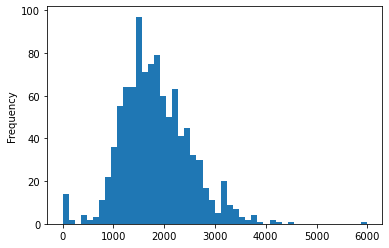

In [22]:
tr['Total'].plot.hist(bins=50)

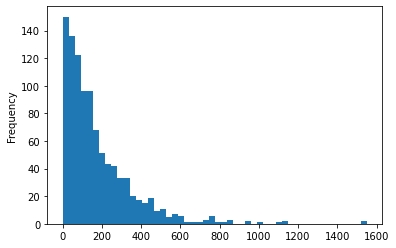

In [23]:
tr['Public transportation (excluding taxicab)'].plot.hist(bins=50)

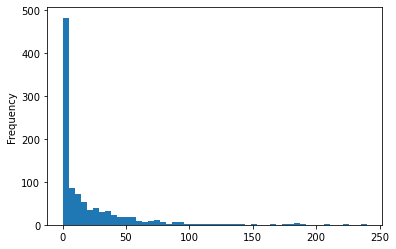

In [24]:
tr['Subway or elevated rail, Light rail, streetcar, or trolley (carro público in Puerto Rico)'].plot.hist(bins=50)

# Sort the data

In [25]:
tr_sorted=tr.sort_values(by='Bus',ascending = False)

In [26]:
tr_sorted[['geoid','Bus']].head(1004)

,geoid,Bus
569,14000US06037209402,1510.0
563,14000US06037209102,1488.0
562,14000US06037208904,1125.0
557,14000US06037208720,1029.0
561,14000US06037208903,973.0
550,14000US06037208401,939.0
570,14000US06037209403,878.0
560,14000US06037208902,836.0
568,14000US06037209401,821.0
620,14000US06037213401,796.0


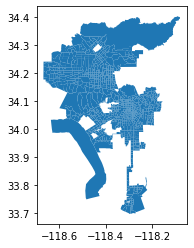

In [27]:
tr_sorted.head(1004).plot()

Now, I want to plot the 10 census tracts with the most bus riders.

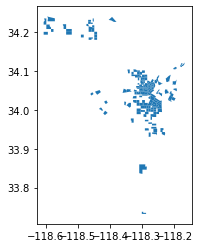

In [73]:
tr_sorted.head(200).plot()

Adding color and showing the 200 census tracts with the most bus riders.

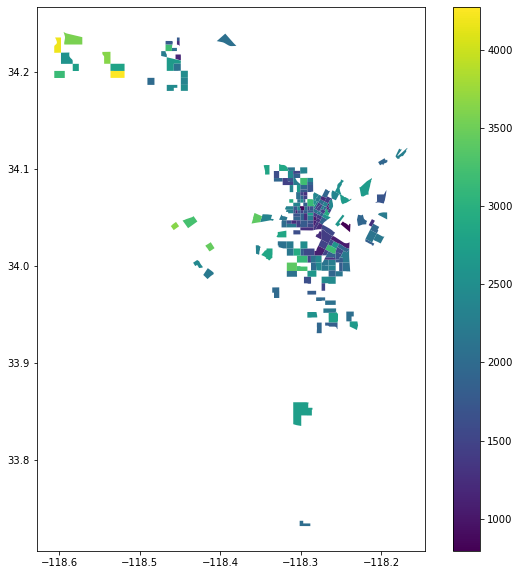

In [32]:
tr_sorted.head(200).plot(figsize=(10,10),column='Total',legend=True)

# Create Choropleth Maps

I want to plot all of the census tracts in Los Angeles to see what bus ridership looks like across the city.

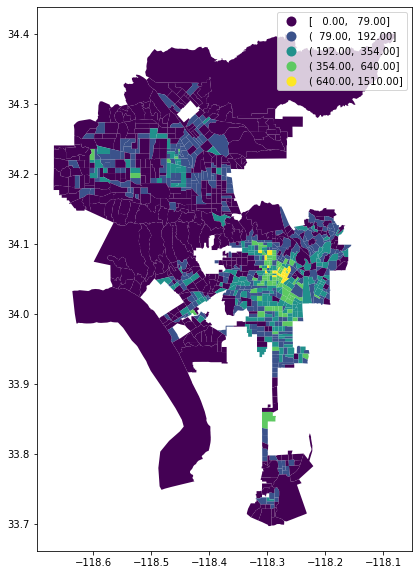

In [37]:
tr.plot(figsize=(12,10),
                 column='Bus',
                 legend=True, 
                 scheme='NaturalBreaks')

Plotting the same data with a different scheme.

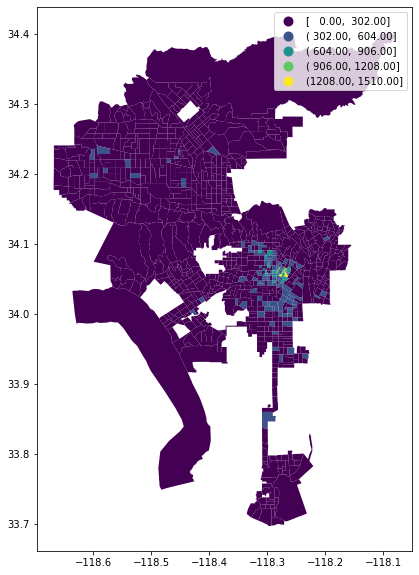

In [39]:
tr.plot(figsize=(12,10),
                 column='Bus',
                 legend=True, 
                 scheme='equal_interval')

# Creating multiple plots using subplots

I want to create one plot for the column 'Bus' and another plot for the column 'Drove Alone'.

Text(0.5, 1.0, 'Drove alone')

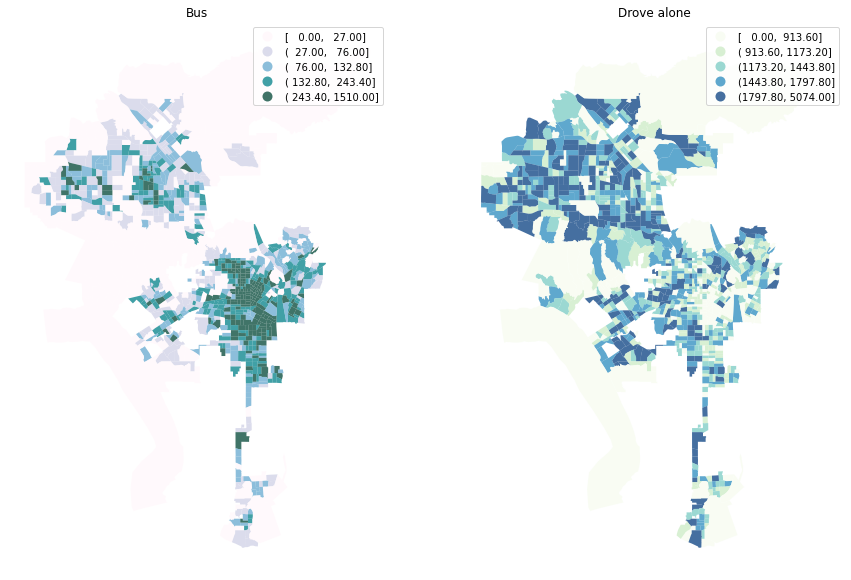

In [44]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs

# regular count map on the leftt
tr.plot(column='Bus', 
            cmap='PuBuGn', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Bus")

# spatial lag map on the right
tr.plot(column='Drove alone', 
            cmap='GnBu', 
            scheme='quantiles',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
           )

ax2.axis("off")
ax2.set_title("Drove alone")

# Creating a boundary map

I want to create a map showing the boundaries of all the census tracts in LA for this dataset.

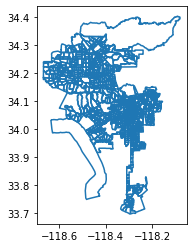

In [50]:
tr.boundary.plot()

Next, I want to create a map showing the boundaries of the top 200 census tracts with the most bus riders.

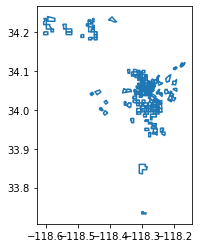

In [46]:
tr_sorted.head(200).boundary.plot()

# Normalize the data

I want to present the data as a percentage.

In [52]:
# output the columns
list(tr)

['geoid',
 'name',
 'Total',
 '30 to 34 minutes',
 'Car, truck, or van',
 '30 to 34 minutes',
 'Drove alone',
 '30 to 34 minutes',
 'Carpooled',
 '30 to 34 minutes',
 'Public transportation (excluding taxicab)',
 '30 to 34 minutes',
 'Bus',
 '30 to 34 minutes',
 'Subway or elevated rail, Light rail, streetcar, or trolley (carro público in Puerto Rico)',
 '30 to 34 minutes',
 'Walked',
 '30 to 34 minutes',
 'Taxicab, motorcycle, bicycle, or other means',
 '30 to 34 minutes',
 'geometry']

In [70]:
# create a new column, and populate it with normalized data to get the percent of total value
tr['Percent Bus'] = tr['Bus']/tr['Total']*100
tr['Percent Drove Alone'] = tr['Drove alone']/tr['Total']*100

Use `.sample` to check the new columns.

In [65]:
tr.sample()

,geoid,name,Total,30 to 34 minutes,"Car, truck, or van",30 to 34 minutes,Drove alone,30 to 34 minutes,Carpooled,30 to 34 minutes,Public transportation (excluding taxicab),30 to 34 minutes,Bus,30 to 34 minutes,"Subway or elevated rail, Light rail, streetcar, or trolley (carro público in Puerto Rico)",30 to 34 minutes,Walked,30 to 34 minutes,"Taxicab, motorcycle, bicycle, or other means",30 to 34 minutes,geometry,Percent Bus,Drove Alone,Percent Drove Alone
418,14000US06037190402,"Census Tract 1904.02, Los Angeles, CA",1275.0,310.0,884.0,167.0,781.0,139.0,103.0,28.0,338.0,143.0,174.0,56.0,164.0,87.0,18.0,0.0,35.0,0.0,"MULTIPOLYGON (((-118.30928 34.10538, -118.3085...",13.647059,61.254902,61.254902


The output from `.sample` shows that 13% of Census Tracts 1904.02's population uses the bus while 61% drive.

Plot the census tracts where more than 30% of the population takes the bus.

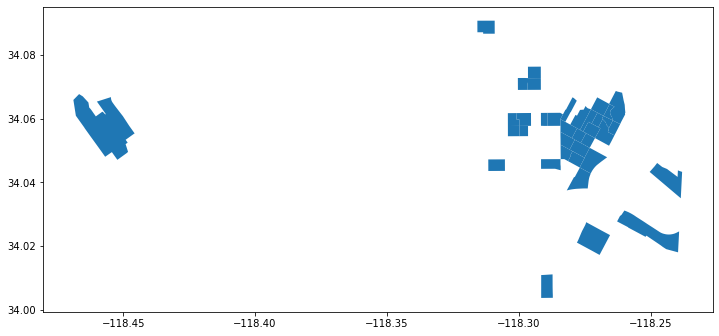

In [66]:
tr[tr['Percent Bus'] > 30].plot(figsize=(12,10))

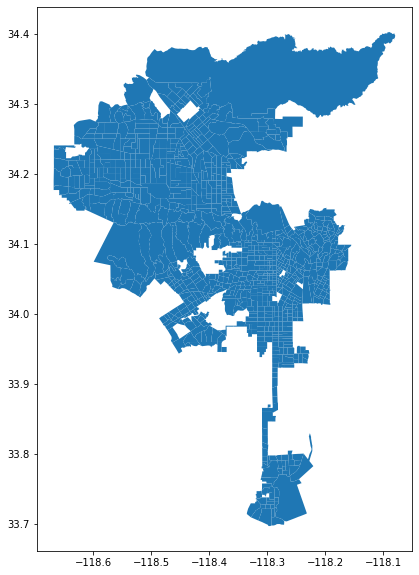

In [71]:
tr[tr['Percent Drove Alone'] > 30].plot(figsize=(12,10))

# Adding a basemap

In [57]:
# reproject geodataframe to Web Mercator
tr_web_mercator = tr.to_crs(epsg=3857)

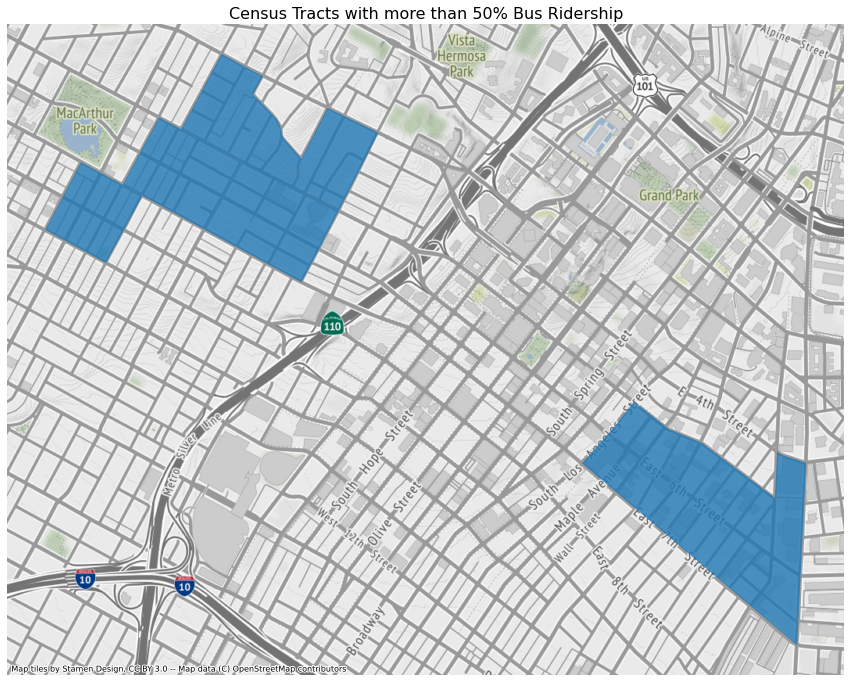

In [67]:
# add subplots
fig, ax = plt.subplots(figsize=(15, 15))

# add the layer with ax=ax in the argument 
tr_web_mercator[tr_web_mercator['Percent Bus'] > 50].plot(ax=ax, alpha=0.8)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Census Tracts with more than 50% Bus Ridership',fontsize=16)

# add a basemap
ctx.add_basemap(ax)

This output shows that there are only two census tracts in Los Angeles where more than 50% of the population use the bus.